<a href="https://colab.research.google.com/github/najibur-rahman/Machine-Learning/blob/main/Feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
data = data.iloc[:, 2:]
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
# trainer test e devide korar por feature scaling korbo

from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop('Purchased', axis = 'columns')
y = data['Purchased']


In [ ]:
# split data test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# x_train e koyta row ache ar x test e koyta ache check kora hoise
x_train.shape, x_test.shape

((320, 2), (80, 2))

In [ ]:
# standard scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# object crete kora hoise
scaler = StandardScaler()

In [ ]:
# scaler nije ekta model jokon kunu data patave sathe sathe scaling kore felbe
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [ ]:
np.round(x_train_scaled.describe(), 1)
np.round(x_test_scaled.describe(), 1)

,Age,EstimatedSalary
count,80.0,80.0
mean,-0.1,-0.1
std,1.1,1.0
min,-1.9,-1.5
25%,-1.0,-0.8
50%,-0.2,-0.2
75%,0.9,0.4
max,2.2,2.1


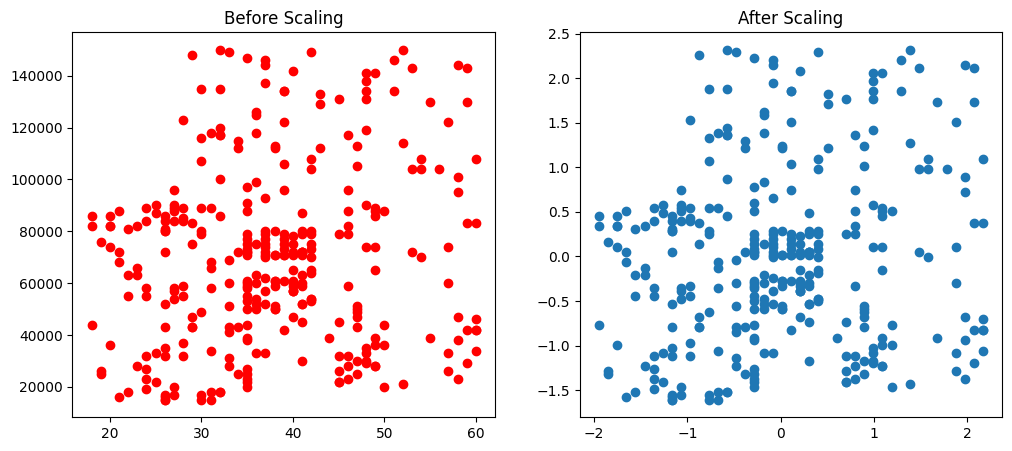

In [ ]:
# oriented er kunu change hoy nah
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'], color = 'red')
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

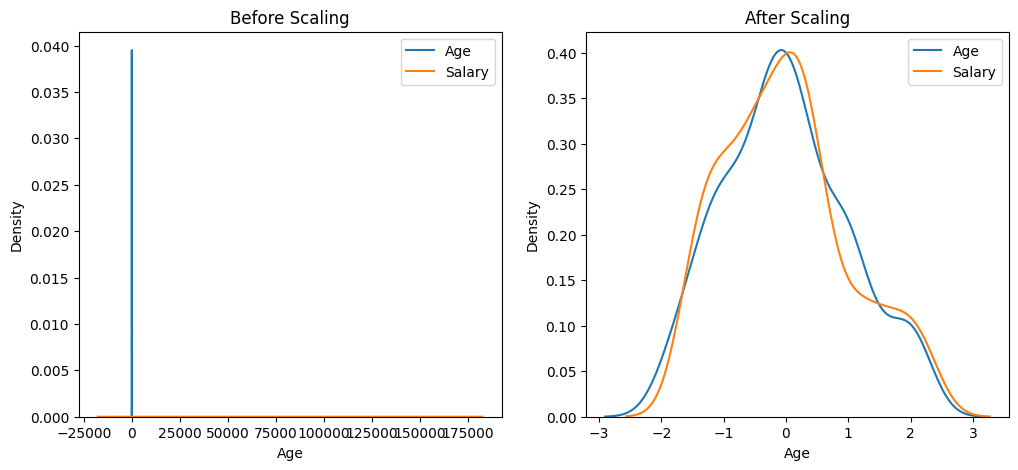

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12,5))

# --- Plot 1  ---
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'], ax = ax1, label='Age')
sns.kdeplot(x_train['EstimatedSalary'], ax = ax1, label='Salary')
ax1.legend()

# --- Plot 2  ---
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax = ax2, label='Age') # Corrected: use sns.kdeplot
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax = ax2, label='Salary') # Corrected: use sns.kdeplot
ax2.legend()

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression()
model2 = LogisticRegression()

In [ ]:
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.8875

In [ ]:
model2.fit(x_train_scaled, y_train)
model2.score(x_test_scaled, y_test)

0.8625